# Heatmap Visualization of Workflow

This notebooks demonstrates how to use the heatmap visualization functions to view the generated workflow. 

Groups are identified as rows and batches are identified as columns. 

Batches are displayed sequentially in the order they are processed in.

The value in each group & batch pair indicates how many rows are processed in that step.

## Imports

In [1]:
from random import randint

from pyspark.sql import SparkSession

from neo4j_parallel_spark_loader.visualize import create_ingest_heatmap

## Data

This is dummy data for demonstration.

### Spark Session

In [2]:
spark_session: SparkSession = (
    SparkSession.builder.appName("Heatmap Example")
    .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/13 13:23:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Create Data

In [3]:
data = []
for i in range(5): # groups
    for j in range(0, randint(3,5)): # batches
        data.extend([{"group": i, "batch": j} for _ in range(randint(1,10))]) # duplicate entries random num of times

sdf = spark_session.createDataFrame(data)


## Create Heatmap 

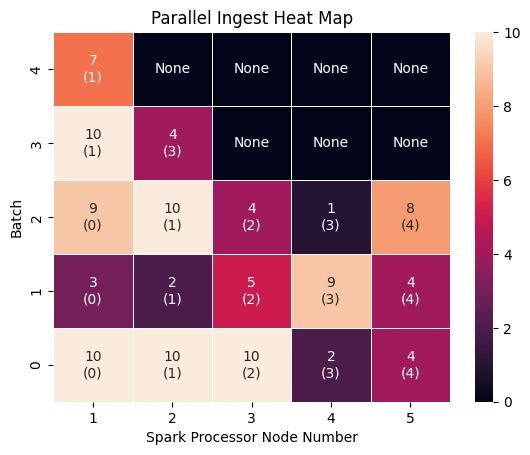

In [4]:
viz = create_ingest_heatmap(sdf)